In [139]:
import pandas as pd
import numpy as np

# Sample DataFrame with missing values in multiple columns
data = {
    'x1': ['[1, 2, 3, 4, 5, 35]', '[2, 4, 6, 8, 10]', '[3, 6, 9, 12, 15]', np.nan, '[5, 10, 15, 20, 25]'],
    'x2': [1, np.nan, 3, 4, np.nan],
    'x3': [np.nan, 2, 3, np.nan, 5]
}
df = pd.DataFrame(data)



def strls_to_ls(x, element_type = int):
    ls_x = x.strip('[]').split(',')
    return [element_type(i) for i in ls_x]

def avg_str_numls(x):
    ls_x = strls_to_ls(x)
    avg_x = sum(ls_x) / len(ls_x)
    return avg_x



In [140]:
#clean
# df['x1'] = df['x1'].apply(lambda x: avg_str_numls(x) if isinstance(x, str) else x)
df[['x1', 'x2', 'x3']] = df[['x1', 'x2', 'x3']].applymap(lambda x: avg_str_numls(x) if isinstance(x, str) else x)


#impute
df.fillna(df.mean(0))

#summary
summary_stats = df.describe(include='all')

print(summary_stats)


#outliers - IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using IQR
outliers_IQR = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


              x1        x2        x3
count   4.000000  3.000000  3.000000
mean    9.583333  2.666667  3.333333
std     3.833333  1.527525  1.527525
min     6.000000  1.000000  2.000000
25%     7.750000  2.000000  2.500000
50%     8.666667  3.000000  3.000000
75%    10.500000  3.500000  4.000000
max    15.000000  4.000000  5.000000


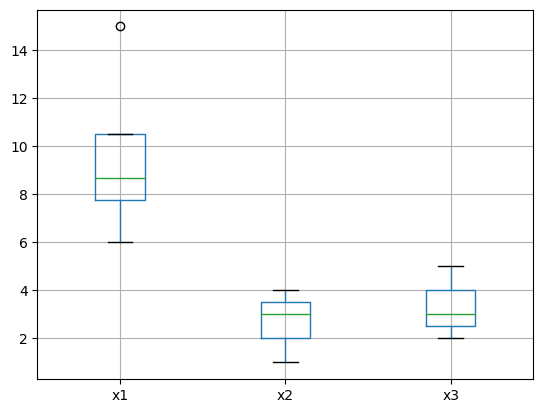

In [135]:
import matplotlib.pyplot as plt

# Plot histograms, box plots, or scatter plots to visualize the distribution of data
# Identify data points that fall far from the main cluster as potential outliers

# Example: Box plot
df.boxplot()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


# Train a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Evaluate the model on the testing data
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)


In [ ]:
# Step 5: Tuning with Cross-Validation
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform hyperparameter tuning using GridSearchCV with k-fold cross-validation
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Select the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

In [ ]:
# Define the ratios for train/validation/test splits (e.g., 60% train, 20% validation, 20% test)
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

# Get the number of samples in the dataset
num_samples = len(X_encoded)

# Generate random indices
indices = np.arange(num_samples)
np.random.shuffle(indices)

# Calculate the number of samples for each split
num_train_samples = int(train_ratio * num_samples)
num_val_samples = int(val_ratio * num_samples)

# Split the indices into training, validation, and testing sets
train_indices = indices[:num_train_samples]
val_indices = indices[num_train_samples:num_train_samples+num_val_samples]
test_indices = indices[num_train_samples+num_val_samples:]

In [3]:
# d = {'A': 'hey', 'B': 'there'}

# ''.join([k + v for k,v in d.items()])

'AheyBthere'

In [147]:
import pandas as pd

# Example DataFrame with a categorical column
data = {
    'category': ['A', 'B', 'C', 'A', 'C', 'B']
}
df = pd.DataFrame(data)

# Apply one-hot encoding to the categorical column
df_encoded = pd.get_dummies(df, columns=['category']).astype(int)

# Concatenate the one-hot encoded columns as row vectors
row_vectors = pd.concat([df_encoded], axis=1)

row_vectors


,category_A,category_B,category_C
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0
4,0,0,1
5,0,1,0
